In [1]:
!pip install nltk
!pip install textblob

from textblob import TextBlob
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
df = pd.read_csv('data.csv')
"Financial Sentiment Analysis"
#display(df.head())

def clean_text(text):
  if isinstance(text, str):
    #converting to lower case
    text = text.lower()

    # removing punctuation, numbers, and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # removing stopwords
    stop_words = set(stopwords.words('english'))

    # tokenizing the words
    word_tokens = word_tokenize(text)

    # filtering the texts
    filtered_text = [w for w in word_tokens if w not in stop_words]

    # preforming stemming
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    #return filtered_text
    return stemmed_text
  else:
    return []

df['cleaned_text'] = df['Sentence'].apply(clean_text)
display(df[['Sentence', 'cleaned_text']].head())

,Sentence,cleaned_text
0,The GeoSolutions technology will leverage Bene...,"[geosolut, technolog, leverag, benefon, gp, so..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[esi, low, 150, 250, bk, real, possibl]"
2,"For the last quarter of 2010 , Componenta 's n...","[last, quarter, 2010, componenta, net, sale, d..."
3,According to the Finnish-Russian Chamber of Co...,"[accord, finnishrussian, chamber, commerc, maj..."
4,The Swedish buyout firm has sold its remaining...,"[swedish, buyout, firm, sold, remain, 224, per..."


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of words back to a string for TF-IDF
df['cleaned_text_string'] = df['cleaned_text'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the cleaned text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text_string'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (5842, 5000)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
X = tfidf_matrix
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print("Shape of X_train:", X_train.shape)
#print("Shape of X_test:", X_test.shape)
#print("Shape of y_train:", y_train.shape)
#print("Shape of y_test:", y_test.shape)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
lr_model.fit(X_train, y_train)

# Train SVC model
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("SVC model trained.")

Logistic Regression model trained.
SVC model trained.


In [6]:
# Evaluating Logistic Regression model
lr_predictions = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")

# Evaluating SVC model
svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("\nSVC Performance:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1:.4f}")

Logistic Regression Performance:
Accuracy: 0.7074
Precision: 0.6838
Recall: 0.7074
F1-score: 0.6760

SVC Performance:
Accuracy: 0.6886
Precision: 0.6597
Recall: 0.6886
F1-score: 0.6528


In [7]:
"""  Model Performance Comparison  """

print("Model Performance Comparison:")
print("--------------------------------------------------")
print(f"{'Metric':<15} {'Logistic Regression':<25} {'SVC':<10}")
print("--------------------------------------------------")
print(f"{'Accuracy':<15} {lr_accuracy:<25.4f} {svm_accuracy:<10.4f}")
print(f"{'Precision':<15} {lr_precision:<25.4f} {svm_precision:<10.4f}")
print(f"{'Recall':<15} {lr_recall:<25.4f} {svm_recall:<10.4f}")
print(f"{'F1-score':<15} {lr_f1:<25.4f} {svm_f1:<10.4f}")
print("--------------------------------------------------")

print("\nInterpretation:")
if lr_accuracy > svm_accuracy:
    print("Based on Accuracy, Precision, Recall, and F1-score, the Logistic Regression model performed slightly better than the SVC model.")
elif svm_accuracy > lr_accuracy:
     print("Based on Accuracy, Precision, Recall, and F1-score, the SVC model performed slightly better than the Logistic Regression model.")
else:
     print("Both models performed similarly based on the evaluated metrics.")


Model Performance Comparison:
--------------------------------------------------
Metric          Logistic Regression       SVC       
--------------------------------------------------
Accuracy        0.7074                    0.6886    
Precision       0.6838                    0.6597    
Recall          0.7074                    0.6886    
F1-score        0.6760                    0.6528    
--------------------------------------------------

Interpretation:
Based on Accuracy, Precision, Recall, and F1-score, the Logistic Regression model performed slightly better than the SVC model.


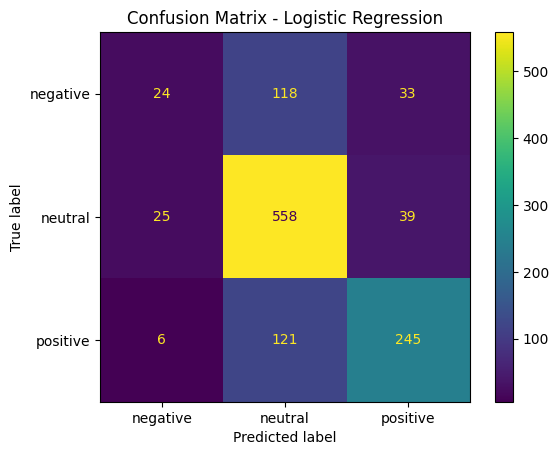

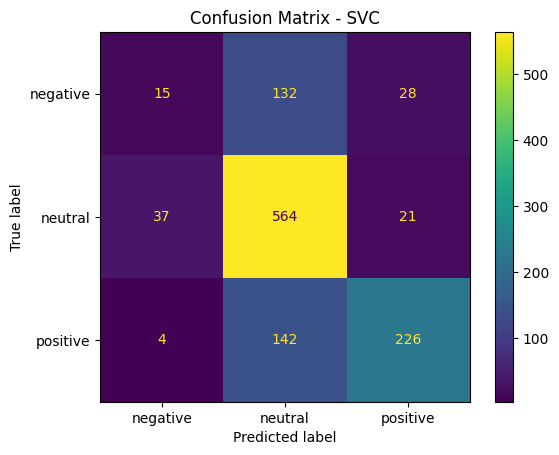

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_model.classes_)
lr_disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix for SVC
svm_cm = confusion_matrix(y_test, svm_predictions)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
svm_disp.plot()
plt.title('Confusion Matrix - SVC')
plt.show()

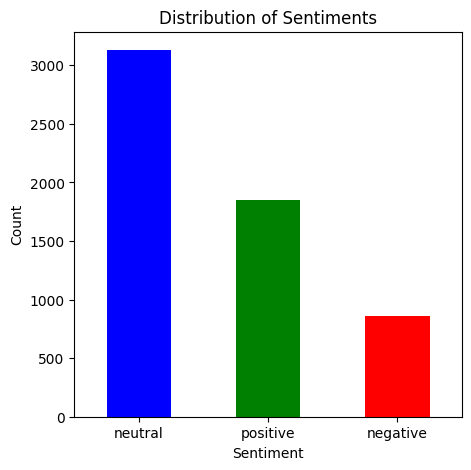

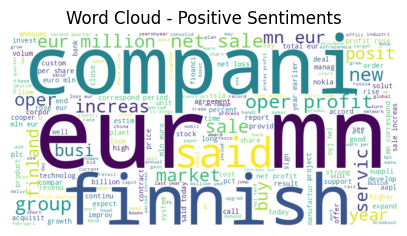

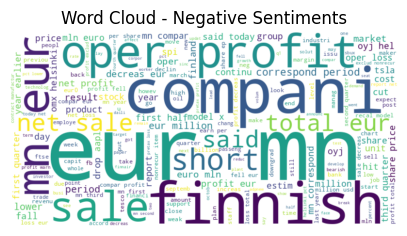

In [13]:
from collections import Counter
from wordcloud import WordCloud

# Plotting sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(5, 5))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Preparing data for word clouds
positive_text = " ".join(df[df['Sentiment'] == 'positive']['cleaned_text_string'])
negative_text = " ".join(df[df['Sentiment'] == 'negative']['cleaned_text_string'])

# word cloud for positive sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiments')
plt.show()

#word cloud for negative sentiments
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiments')
plt.show()